Final Project: exploring factors influencing health and lifestyle

In [11]:
import pandas as pd

In [15]:
df= pd.read_csv('weight_change_dataset.csv')

In [17]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [21]:
df.describe()


,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


In [27]:
print (df['Physical Activity Level'].value_counts())
print (df['Sleep Quality'].value_counts())
print (df['Stress Level'].value_counts())

Physical Activity Level
Lightly Active       31
Moderately Active    25
Very Active          23
Sedentary            21
Name: count, dtype: int64
Sleep Quality
Poor         38
Fair         24
Good         22
Excellent    16
Name: count, dtype: int64
Stress Level
3    14
2    14
6    13
1    11
5    11
8    11
7    10
9     9
4     7
Name: count, dtype: int64


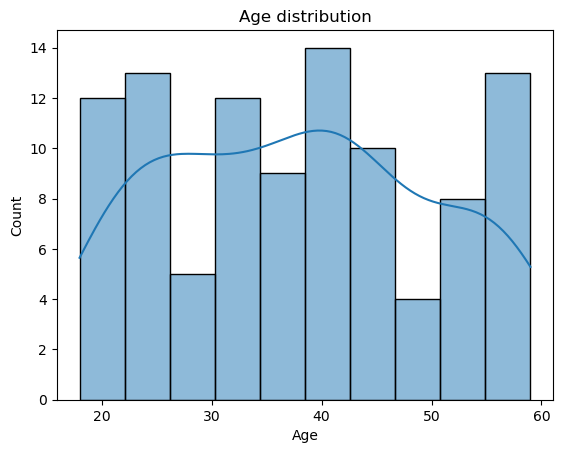

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
#Age 
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age distribution')
plt.show()

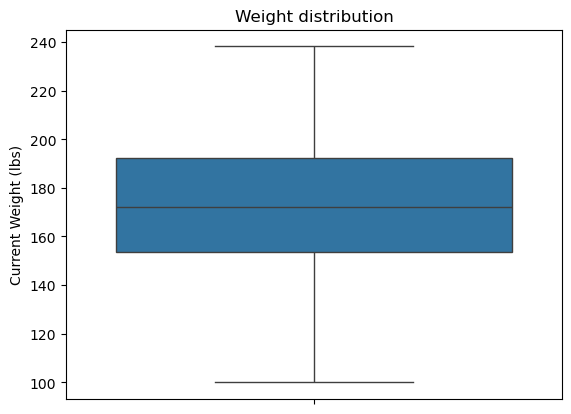

In [39]:
#Weight boxplot
sns.boxplot(y='Current Weight (lbs)', data=df)
plt.title('Weight distribution')
plt.show()

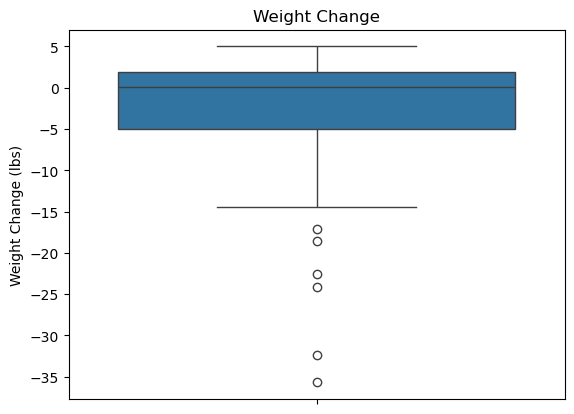

In [41]:
sns.boxplot(y= 'Weight Change (lbs)', data=df)
plt.title('Weight Change')
plt.show()

Hypothesis 1:
Null Hypothesis. H0 = Sleep quality has no effect on weinght change. The mean weight change is the same across different levels of sleep quality.
alternative Hypothesi. H1 = Sleep quality has a significant effect on weight change. At least one group has a different mean.
- Type of test, since Sleep Quality is categorical with more than two levels (e.g., Poor, Fair, Good, Excellent) and weight change is continuous, we'll use One-way ANOVA.
- 

In [49]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
#Grouping weight by sleep quality 
groups_sleep = [group['Weight Change (lbs)'].values for name, group in df.groupby ('Sleep Quality')]
#ANOVA TEST
f_stat, p_val = stats.f_oneway(*groups_sleep)
print ('ANOVA F-statistic:', round(f_stat, 4))
print ('p-value:', round(p_val, 4))


ANOVA F-statistic: 19.7333
p-value: 0.0


/var/folders/3w/7wh2_1l57rbc78s7f9lcj84h0000gn/T/ipykernel_97628/4151695329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Quality', y='Weight Change (lbs)', data=df, palette='pastel')


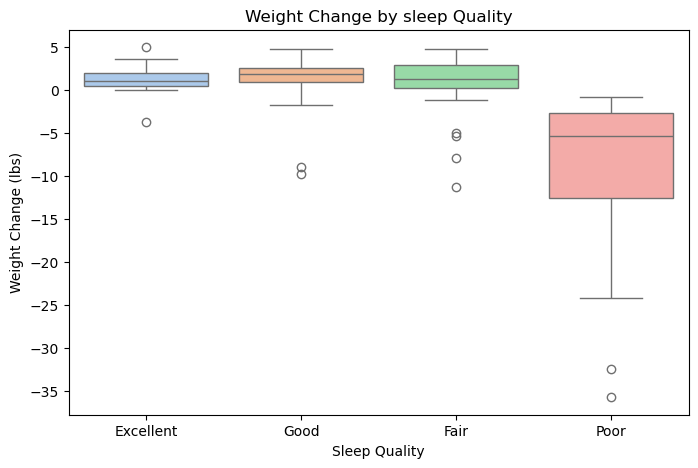

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Sleep Quality', y='Weight Change (lbs)', data=df, palette='pastel')
plt.title('Weight Change by sleep Quality')
plt.xlabel ('Sleep Quality')
plt.ylabel ('Weight Change (lbs)')
plt.show()

#Interpretation: Based on the ANOVA test, F-statistic is 19.73 and the P-value es 0.00. Since the P-value es less than 0.05 we reject the null hypothesis and conclude that sleep quality has a statistically significant effect on weight change. This suggest that individuals with different sleep quality levels tend to experience different patterns of weight change.


Hypothesis 2: 
Null hypethesis: There is not significant correlation between stress level and weight change.
Alternative hypothesis: There is a significant correlation between stress level and weight change.

Spearman correlation: -0.4367
p-value: 0.0


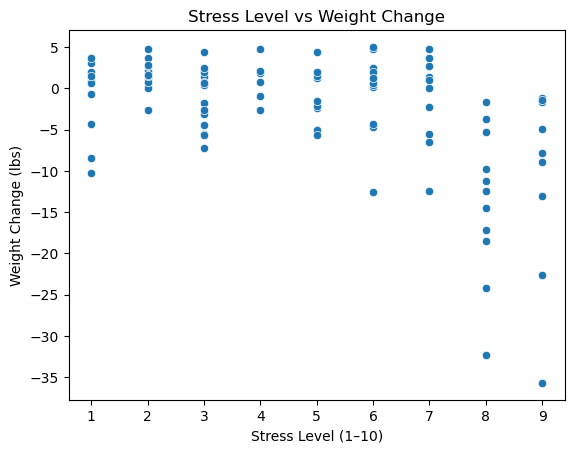

In [57]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values if any
df_corr = df[['Stress Level', 'Weight Change (lbs)']].dropna()

# Spearman correlation
r_spearman, p_spearman = spearmanr(df_corr['Stress Level'], df_corr['Weight Change (lbs)'])

print("Spearman correlation:", round(r_spearman, 4))
print("p-value:", round(p_spearman, 4))

# Scatterplot
sns.scatterplot(x='Stress Level', y='Weight Change (lbs)', data=df_corr)
plt.title('Stress Level vs Weight Change')
plt.xlabel('Stress Level (1–10)')
plt.ylabel('Weight Change (lbs)')
plt.show()

Interpretation: The Spearman correlation coefficient was -0.4367 with a p-value of 0.0. Since the p-value is less than 0.05 we reject the null hypothesis. This indicates that stress level is significantly associated with weight change in this data set. 

These results suggest that stress management may play a role in weight regulation. Individuals with higher stress levels may experience different patterns of weight change. This highlights the importance of addressing stress in health and nutrition programs.

In [61]:
#Correlations
#Pearson correlation: Age vs Weight Change
from scipy.stats import pearsonr

r_pearson, p_pearson = pearsonr(df['Age'], df['Weight Change (lbs)'])
print("Pearson correlation (Age vs Weight Change):", round(r_pearson, 4), "p-value:", round(p_pearson, 4))

Pearson correlation (Age vs Weight Change): 0.0627 p-value: 0.5353


In [63]:
# 2. Spearman correlation: Physical Activity vs Sleep Quality
# Map categories to numbers
activity_map = {'Sedentary': 1, 'Lightly Active': 2, 'Moderately Active': 3, 'Very Active': 4}
sleep_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}

df['Activity_Level_Code'] = df['Physical Activity Level'].map(activity_map)
df['Sleep_Quality_Code'] = df['Sleep Quality'].map(sleep_map)

from scipy.stats import spearmanr

r_spearman, p_spearman = spearmanr(df['Activity_Level_Code'], df['Sleep_Quality_Code'])
print("Spearman correlation (Activity vs Sleep):", round(r_spearman, 4), "p-value:", round(p_spearman, 4))

Spearman correlation (Activity vs Sleep): -0.1665 p-value: 0.0978


In [73]:
#Correlation: 3
# 1. Map gender to binary values (M = 1, F = 0)
df['Gender_Binary'] = df['Gender'].map({'M': 1, 'F': 0})

# 2. Filter only valid (non-null) rows
df_pb = df[['Gender_Binary', 'Weight Change (lbs)']].dropna()

# 3. Import and calculate Point-Biserial correlation
from scipy.stats import pointbiserialr

r_pb, p_pb = pointbiserialr(df_pb['Gender_Binary'], df_pb['Weight Change (lbs)'])

# 4. Print the result
print("Point-Biserial correlation (Gender vs Weight Change):", round(r_pb, 4), "p-value:", round(p_pb, 4))

Point-Biserial correlation (Gender vs Weight Change): -0.0674 p-value: 0.5052


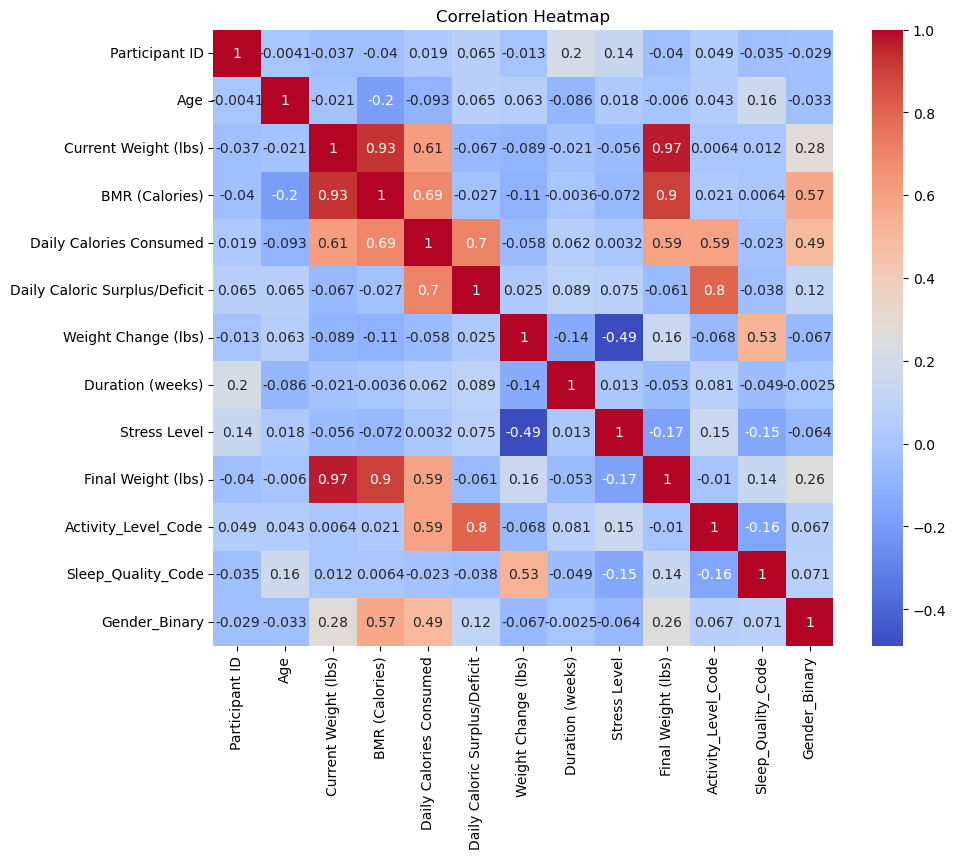

In [75]:
# 4. Correlation heatmap (numeric variables)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*1. Pearson Correlation (Age vs Weight Change):*  
The Pearson correlation coefficient was *0.0627* with a p-value of *0.5353*.  
Since the p-value is greater than 0.05, we *fail to reject the null hypothesis*.  
This suggests that there is *no significant linear relationship* between age and weight change in this dataset.

---

*2. Spearman Correlation (Physical Activity Level vs Sleep Quality):*  
The Spearman correlation was *-0.1665* with a p-value of *0.0978*.  
Although this indicates a weak negative relationship (as activity level increases, sleep quality might decrease slightly), the result is *not statistically significant* at the 0.05 level.

---

*3. Point-Biserial Correlation (Gender vs Weight Change):*  
The point-biserial correlation coefficient was *-0.0674, with a p-value of **0.5052*.  
This implies that gender is *not significantly associated* with weight change in this dataset.

---

*4. Correlation Heatmap Insight:*  
The heatmap provides a visual summary of all numeric relationships.  
Notably, the strongest correlation appears between BMR and Current Weight (lbs) (~0.93), which is expected since Basal Metabolic Rate is heavily influenced by weight.

No other pair of variables shows strong correlation (>0.5), and most health-related metrics (like stress, sleep, or activity level) do not strongly correlate with weight change directly.

## IV. Interpretation & Real-World Application

### Insights from the Data

After conducting hypothesis tests and correlation analyses, several key insights emerged:

- *Sleep quality* was significantly associated with weight change. Individuals reporting better sleep tended to lose more weight, suggesting that improving sleep hygiene may support weight management.
  
- *Stress level* also showed a statistically significant correlation with weight change. Higher stress levels were linked with greater variations in weight, reinforcing the role of mental health in physical outcomes.

- *Gender, age, and physical activity level* did not show statistically significant associations with weight change in this dataset. This suggests that demographic characteristics alone may not be sufficient predictors without considering other behavioral or physiological factors.

---

### Real-World Implications

- *Personal health strategies:*  
  Improving sleep and reducing stress could enhance the effectiveness of dietary or exercise-based weight loss plans.

- *Health policy recommendations:*  
  Programs addressing stress and sleep could be integrated into public health campaigns aimed at reducing obesity and related conditions.

- *Future interventions:*  
  Multidisciplinary approaches that combine *mental health support, sleep optimization, and personalized nutrition* may be more effective than traditional one-size-fits-all plans.

---

### Limitations

- The dataset size (100 participants) is relatively small.  
- Self-reported variables (like stress and sleep quality) may introduce bias.  
- The study focused on short-term changes (1 to 12 weeks), so long-term effects are unknown.

Despite these limitations, the findings provide a valuable foundation for understanding how *lifestyle factors* influence weight outcomes and can inform *practical strategies* in both personal and public health contexts.

## V. Presentation & Reporting

### 🎯 Introduction
This project explores how different lifestyle factors—such as sleep quality, stress level, physical activity, and diet—may influence weight change.  
Using real-world data from 100 participants, we conducted hypothesis testing and correlation analyses to uncover meaningful relationships between these variables.

---

### 🧪 Methods Summary

*Exploratory Data Analysis (EDA):*
- Descriptive statistics for continuous variables (mean, median, std).
- Visualizations: histograms, boxplots, and heatmaps.

*Hypothesis Testing:*
- *Hypothesis 1:* Sleep quality affects weight change → One-Way ANOVA.
- *Hypothesis 2:* Stress level is associated with weight change → Spearman correlation.

*Correlation Testing:*
- *Pearson:* Age vs Weight Change
- *Spearman:* Activity Level vs Sleep Quality
- *Point-Biserial:* Gender vs Weight Change
- *Heatmap:* Strength and direction of all numeric variable relationships

---

### 📈 Key Visualizations
- Boxplots showing weight change by sleep quality and stress level
- Scatterplots for continuous relationships
- Heatmap highlighting correlations across all variables

---

### 🧠 Conclusions & Insights
- *Sleep and stress* significantly influence weight change.
- *Age, gender, and physical activity* showed no significant direct effects.
- The findings support the idea that *mental and emotional well-being* are essential components in weight management strategies.

---

### 🌍 Real-World Relevance
- Personalized interventions focused on *sleep hygiene and stress reduction* may enhance health outcomes.
- These insights can inform *public health programs*, clinical nutrition guidelines, and lifestyle coaching.

---

### 🔍 Future Work
- Use larger, more diverse datasets
- Explore longitudinal effects beyond 12 weeks
- Include biometric variables (e.g., hormone levels, sleep duration, etc.)